In [1]:
library("factoextra")
library("dplyr")
library(openxlsx)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




# PCA

In [2]:
sweat_rate <- c(3.7, 5.7, 3.8, 3.2, 3.1, 4.6, 2.4, 7.2, 6.7, 5.4, 3.9, 4.5, 3.5, 4.5, 1.5, 8.5, 4.5, 6.5, 4.1, 5.5)
sodium <- c(48.5, 65.1, 47.2, 53.2, 55.5, 36.1, 24.8, 33.1, 47.4, 54.1, 36.9, 58.8, 27.8, 40.2, 13.5, 56.4, 71.6, 52.8, 44.1, 40.9)
potassium <- c(9.3, 8, 10.9, 12, 9.7, 7.9, 14, 7.6, 8.5, 11.3, 12.7, 12.3, 9.8, 8.4, 10.1, 7.1, 8.2, 10.9, 11.2, 9.4)

data <- cbind(sweat_rate, sodium, potassium)
data

sweet_rate,sodium,potassium
3.7,48.5,9.3
5.7,65.1,8.0
3.8,47.2,10.9
3.2,53.2,12.0
3.1,55.5,9.7
4.6,36.1,7.9
2.4,24.8,14.0
7.2,33.1,7.6
6.7,47.4,8.5
5.4,54.1,11.3


In [26]:
S <- cov(data)
S

,sweet_rate,sodium,potassium
sweet_rate,2.879368,10.0100,-1.809053
sodium,10.010000,199.7884,-5.640000
potassium,-1.809053,-5.6400,3.627658


In [3]:
R <- cor(data)
R

,sweet_rate,sodium,potassium
sweet_rate,1.0000000,0.4173499,-0.5597440
sodium,0.4173499,1.0000000,-0.2094984
potassium,-0.5597440,-0.2094984,1.0000000


In [4]:
eigen(R)

eigen() decomposition
$values
[1] 1.8078076 0.8009595 0.3912329

$vectors
           [,1]       [,2]       [,3]
[1,] -0.6532613 -0.1017681  0.7502619
[2,] -0.4876988  0.8145266 -0.3141596
[3,]  0.5791369  0.5711301  0.5817309


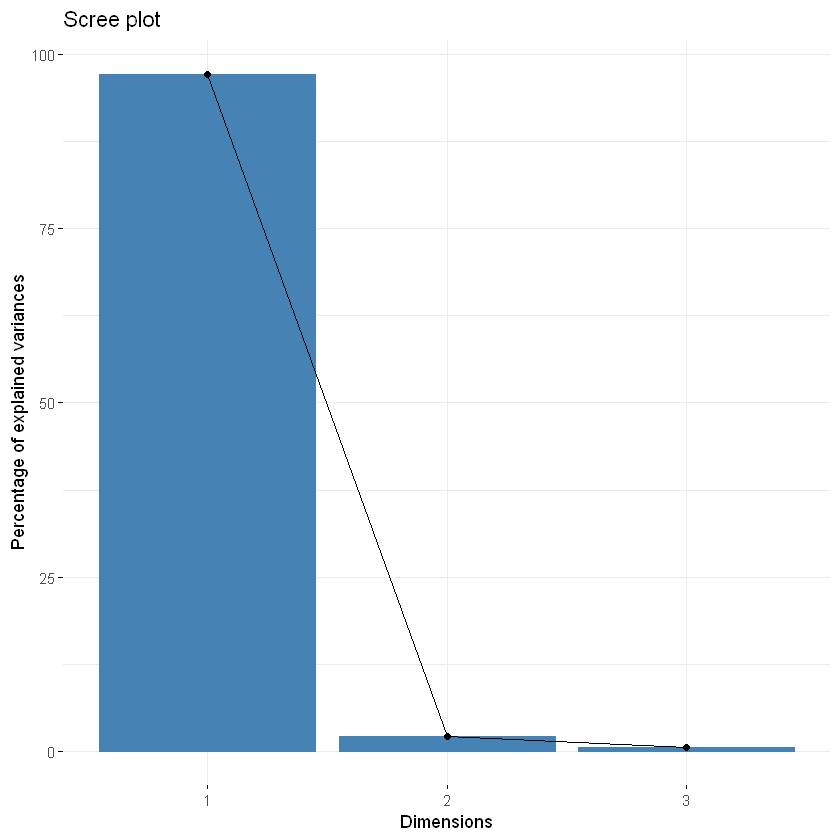

In [6]:
fviz_eig(prcomp(data))

In [14]:
prcompcor<-function(cor){
  cor<-cor
  p<-ncol(cor)
  eig<-eigen(cor)$values
  eigvec<-eigen(cor)$vectors
  std<-sqrt(eig)
  #meanvec<-colMeans(data)
  vartot<-p
  prop_var<-eig/vartot
  cum_prob<-cumsum(prop_var)
  
  prcomp_name<-rep(0,ncol(cor))
    for ( i in 1:ncol(cor)){
       prcomp_name[i]<-paste("comp",i,sep=".")
  }
  loadings<-data.frame(colnames(cor),round(eigvec,5))
  colnames(loadings)<-c("variabel",prcomp_name)
  importancevar<-data.frame(rbind(eig,prop_var,cum_prob))
  rownames(importancevar)<-c("Variance","Proportion of Variance","Cumulative Proportion")
  colnames(importancevar)<-prcomp_name
  scree<-plot(prop_var,type="o",ylab="Proporsi Varians yang dapat dijelaskan",main="Scree Plot No 1")
  result<-list(importancevar,loadings,scree)
  names(result)<-c("Importance of components :","Loadings (Coefficient): ","Scree plot")
  return(result)
}

,comp.1,comp.2,comp.3
,<dbl>,<dbl>,<dbl>
Variance,1.8078076,0.8009595,0.3912329
Proportion of Variance,0.6026025,0.2669865,0.1304110
Cumulative Proportion,0.6026025,0.8695890,1.0000000
variabel,comp.1,comp.2,comp.3
<chr>,<dbl>,<dbl>,<dbl>
sweet_rate,-0.65326,-0.10177,0.75026
sodium,-0.48770,0.81453,-0.31416
potassium,0.57914,0.57113,0.58173


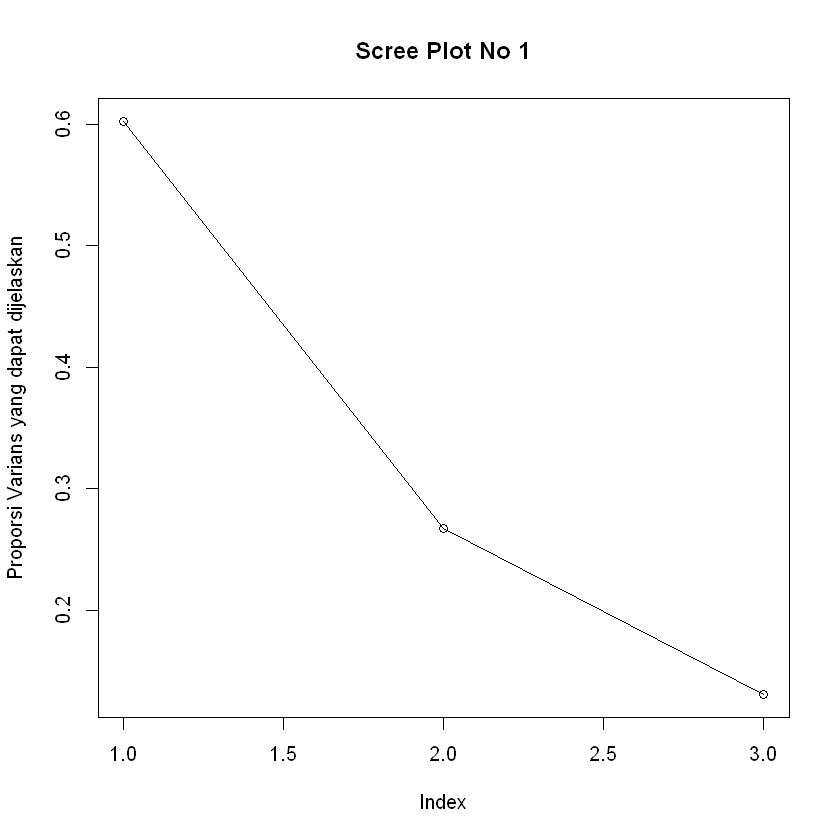

In [16]:
result <- prcompcor(R)
result

Komponen utama yang sebaiknya digunakan sebanyak 2 komponen. Hal ini dikarenakan Cumulative Proportion of Variance Komponen 2 > 0.75, yaitu 0.8696. Artinya, kedua komponen utama telah mampu menangkan 86.96 persen dari total keragaman data. <br> <br>
Berdasarkan tabel 'Loadings', diperoleh persamaan komponen utama (Kombinasi Linier)
$$
Y_1 = -0.65326X_1 - 0.48770X_2 + 0.57914X_3 \\
Y_2 = -0.10177	X_1 + 0.81453X_2 + 0.57113X_3
$$
Pada komponen pertama, variabel $X_1$ dan $X_3$ adalah variabel yang dominan dengan nilai $loading$ lebih dari $0.5$ <br>
Pada komponen kedua, variabel $X_2$ dan $X_3$ adalah variabel yang dominan dengan nilai $loading$ lebih dari $0.5$ <br>
Secara umum, komponen pertama didominasi oleh variabel yang berkaitan dengan (var1), sedangkan komponen pertama didominasi oleh variabel yang berkaitan dengan (var2)  <br> <br>
Berdasarkan Scree Plot diatas, banyaknya komponen utama yang dipilih adalah 2. Hal ini karena titik ekstrim dimana garis kurva mulai melandai ditunjukkan pada komponen ke 2.

Kesimpulan <br> <br>

Dengan metode analisis komponen utama, dapat diketahui bahwa data ... yang terdiri atas 3 variabel dapat direduksi menjadi 2 variabel dengan tetap dapat menggambarkan keragaman data awal. Kedua variabel tersebut adalah (var1), dan (var2). Dari kedua variabel tersebut yang berperan besar dalam menjelaskan data ... adalah (var1). Selain itu variabel baru yang terbentuk ini dapat digunakan untuk analisis lanjutan seperti regresi dan klasifikasi dan telah mengatasi masalah multikolinearitas karena memiliki sifat saling bebas satu sama lain.

# FA

In [ ]:
library("psych")

In [2]:
sweat_rate <- c(3.7, 5.7, 3.8, 3.2, 3.1, 4.6, 2.4, 7.2, 6.7, 5.4, 3.9, 4.5, 3.5, 4.5, 1.5, 8.5, 4.5, 6.5, 4.1, 5.5)
sodium <- c(48.5, 65.1, 47.2, 53.2, 55.5, 36.1, 24.8, 33.1, 47.4, 54.1, 36.9, 58.8, 27.8, 40.2, 13.5, 56.4, 71.6, 52.8, 44.1, 40.9)
potassium <- c(9.3, 8, 10.9, 12, 9.7, 7.9, 14, 7.6, 8.5, 11.3, 12.7, 12.3, 9.8, 8.4, 10.1, 7.1, 8.2, 10.9, 11.2, 9.4)

data <- cbind(sweat_rate, sodium, potassium)
data

sweet_rate,sodium,potassium
3.7,48.5,9.3
5.7,65.1,8.0
3.8,47.2,10.9
3.2,53.2,12.0
3.1,55.5,9.7
4.6,36.1,7.9
2.4,24.8,14.0
7.2,33.1,7.6
6.7,47.4,8.5
5.4,54.1,11.3


In [26]:
S <- cov(data)
S

,sweet_rate,sodium,potassium
sweet_rate,2.879368,10.0100,-1.809053
sodium,10.010000,199.7884,-5.640000
potassium,-1.809053,-5.6400,3.627658


In [3]:
R <- cor(data)
R

,sweet_rate,sodium,potassium
sweet_rate,1.0000000,0.4173499,-0.5597440
sodium,0.4173499,1.0000000,-0.2094984
potassium,-0.5597440,-0.2094984,1.0000000


In [4]:
eigen(R)

eigen() decomposition
$values
[1] 1.8078076 0.8009595 0.3912329

$vectors
           [,1]       [,2]       [,3]
[1,] -0.6532613 -0.1017681  0.7502619
[2,] -0.4876988  0.8145266 -0.3141596
[3,]  0.5791369  0.5711301  0.5817309


In [48]:
# MSA KMO

KMO(R)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = R)
Overall MSA =  0.56
MSA for each item = 
sweet_rate     sodium  potassium 
      0.54       0.61       0.56 

KMO > .9 were marvelous, in the .80s, mertitourious, in the .70s, middling, in the .60s, medicore, in the 50s, miserable, and less than .5, unacceptable
KMO values between 0.8 and 1 indicate the sampling is adequate. KMO values less than 0.6 indicate the sampling is not adequate and that remedial action should be taken.

In [53]:
factanal(x = data, factors = 1)


Call:
factanal(x = data, factors = 1)

Uniquenesses:
sweet_rate     sodium  potassium 
     0.005      0.825      0.685 

Loadings:
           Factor1
sweet_rate  0.997 
sodium      0.418 
potassium  -0.561 

               Factor1
SS loadings      1.485
Proportion Var   0.495

The degrees of freedom for the model is 0 and the fit was 0.0011 

# Clustering

In [27]:
library(factoextra)
library(dendextend)
library(FactoClass)

In [41]:
rawData <- read.xlsx("Data_TernakJabar16.xlsx")
for(i in c(2:5)){
  rawData[, i] <- as.numeric(rawData[, i])
    }
head(rawData)

,Kab,SapiPotong,Kerbau,Kambing,Domba
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bogor,1.7129131,2.94990853,1.7630941,-0.168919195
2,Sukabumi,0.1996910,0.92523454,0.7108161,-0.047104308
3,Cianjur,1.4844129,0.96203906,1.0974706,0.122876246
4,Bandung,0.8705228,-0.02870453,-0.3673762,-0.135549618
5,Garut,1.0264791,1.36539956,0.8287300,1.215511215
6,Tasikmalaya,2.5664384,1.60622450,1.1721507,0.008783035


In [42]:
data <- round(scale(rawData[, c(2:5)]),4)
head(data)

,SapiPotong,Kerbau,Kambing,Domba
1,1.7129,2.9499,1.7631,-0.1689
2,0.1997,0.9252,0.7108,-0.0471
3,1.4844,0.9620,1.0975,0.1229
4,0.8705,-0.0287,-0.3674,-0.1355
5,1.0265,1.3654,0.8287,1.2155
6,2.5664,1.6062,1.1722,0.0088


In [46]:
# Normalisasi data
attr(data,"scaled:center")
attr(data,"scaled:scale")

SapiPotong        Kerbau       Kambing         Domba 
 2.484510e-16  3.649344e-17  2.148487e-16 -1.541334e-16

SapiPotong     Kerbau    Kambing      Domba 
         1          1          1          1

In [47]:
# Menentukan jumlah klaster
jumlah_klaster <- c(1:10) #Vektor yang berisikan jumlah klaster yang ingin dilihat nilai dari total within-cluster sum of squares
within_ss <- c() #Vektor kosong yang akan diisi nilai total withincluster sum of squares
for (i in jumlah_klaster) {
    within_ss <- c(within_ss,
                   kmeans(x = data, centers = i, nstart = 25)$tot.withinss)}
plot(x = jumlah_klaster, y = within_ss, type = "b", xlab = "Number of Cluster",
ylab = "Total Within Sum of Squares", main = "Elbow Plot")
abline(v = 7, col = 'red')

ERROR: Error in do_one(nmeth): NA/NaN/Inf in foreign function call (arg 1)


# Canonical

In [64]:
library(openxlsx)
library(CCA)
library(GGally)

Loading required package: fda

Loading required package: splines

Loading required package: fds

Loading required package: rainbow

Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: pcaPP

Loading required package: RCurl

Loading required package: deSolve


Attaching package: 'fda'


The following object is masked from 'package:graphics':

    matplot


Loading required package: fields

Loading required package: spam

Spam version 2.8-0 (2022-01-05) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: 'spam'


The following objects are masked from 'package:base':

    backsolve, forwardsolve


Loading required package: viridis

Loading required package: viridisLite


Try help(fields) to get st

In [59]:
canonData <- read.xlsx("fifa.xlsx")
head(canonData)

,ID,name,pac,sho,pas,dri,phy,crossing,finishing,heading_accuracy,⋯,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,standing_tackle,sliding_tackle
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,158023,L. Messi,89,90,86,96,61,77,95,71,⋯,59,88,48,22,93,90,78,96,28,26
2,190871,Neymar,92,84,79,95,60,75,89,62,⋯,53,77,56,36,90,80,81,92,24,33
3,188545,R. Lewandowski,81,88,75,86,82,62,91,85,⋯,84,83,80,39,91,78,84,87,42,19
4,183277,E. Hazard,90,82,84,92,66,80,83,57,⋯,65,82,54,41,85,86,86,87,27,22
5,167664,G. Higuaín,79,87,70,83,74,68,91,86,⋯,85,82,50,20,92,70,70,86,22,18
6,192985,K. De Bruyne,75,84,88,85,75,90,83,53,⋯,73,86,68,56,84,90,77,84,51,40


In [60]:
data <- canonData[,-c(1,2,5,8,11,12,15,21,22,23,26,27,28,29,4,7,9,20)]
x <- data[,c(1, 6,7,8,9)]
y <- data[,-c(1, 6,7,8,9)]

In [63]:
head(x)
head(y)

,pac,balance,shot_power,jumping,stamina
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,89,95,85,68,73
2,92,82,80,61,78
3,81,80,88,84,79
4,90,91,79,59,79
5,79,69,88,79,72
6,75,75,85,65,87


,dri,heading_accuracy,ball_control,agility,positioning,vision
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,96,71,95,90,93,90
2,95,62,95,96,90,80
3,86,85,89,78,91,78
4,92,57,92,93,85,86
5,83,86,85,75,92,70
6,85,53,87,80,84,90


In [67]:
cor(x)

,pac,balance,shot_power,jumping,stamina
pac,1.0000000000,0.28582192,0.0001404994,0.09945161,0.19596799
balance,0.2858219239,1.00000000,-0.2441426908,-0.23358891,0.01113566
shot_power,0.0001404994,-0.24414269,1.0000000000,0.25119815,-0.12686231
jumping,0.0994516113,-0.23358891,0.2511981535,1.00000000,0.11322031
stamina,0.1959679883,0.01113566,-0.1268623104,0.11322031,1.00000000


In [68]:
cor(y)

,dri,heading_accuracy,ball_control,agility,positioning,vision
dri,1.00000000,-0.3188569,0.8131646,0.650582331,0.056585685,0.299777345
heading_accuracy,-0.31885690,1.0000000,-0.1771454,-0.479899046,0.547726380,-0.343361311
ball_control,0.81316459,-0.1771454,1.0000000,0.271808177,0.176898251,0.466890750
agility,0.65058233,-0.4798990,0.2718082,1.000000000,-0.145528364,0.006317004
positioning,0.05658569,0.5477264,0.1768983,-0.145528364,1.000000000,0.008354592
vision,0.29977734,-0.3433613,0.4668908,0.006317004,0.008354592,1.000000000


# Discriminant

In [49]:
rawData <- read.xlsx("Data_IKRT.xlsx")
rawData

,Tabel.1..Rata-Rata.Upah.dan.Produktivitas.Tenaga.Kerja,X2,X3,X4,Tabel.2..Rata-Rata.Upah.dan.Produktivitas.Tenaga.Kerja,X6,X7,X8
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,,menurut Lokasi IKRT yang Teragglomerasi,NA,NA,,menurut Lokasi IKRT yang Tidak Teragglomerasi,NA,NA
2,No.,Kabupaten/Kota,Rata-Rata Upah per bulan,Produktivitas Tenaga Kerja,No.,Kabupaten/Kota,Rata-Rata Upah per bulan,Produktivitas Tenaga Kerja
3,NA,NA,(ratusan ribu rupiah),(juta rupiah),NA,NA,(ratusan ribu rupiah),(juta rupiah)
4,1,Kota Magelang,11.8,18.2,1,Batang,10,18.7
5,2,Kota Surakarta,12.6,19.5,2,Pemalang,11.9,18.3
6,3,Kota Semarang,13.1,20.5,3,Brebes,10.9,18.3
7,4,Kota Pekalongan,12.5,19.100000000000001,4,Salatiga,11.9,17.3
8,5,Kota Tegal,12.5,18.600000000000001,5,Cilacap,9.5,18.8
9,6,Sukoharjo,11.5,19.600000000000001,6,Banyumas,10.4,19.600000000000001


In [55]:
data <- rawData[(4:21),c(3:4,7:8)]
data

,X3,X4,X7,X8
,<chr>,<chr>,<chr>,<chr>
4,11.8,18.2,10,18.7
5,12.6,19.5,11.9,18.3
6,13.1,20.5,10.9,18.3
7,12.5,19.100000000000001,11.9,17.3
8,12.5,18.600000000000001,9.5,18.8
9,11.5,19.600000000000001,10.4,19.600000000000001
10,9.9,19.100000000000001,10.6,18.899999999999999
11,12.6,19.899999999999999,9.4,17.899999999999999
12,12,20.100000000000001,10.6,19
